In [1]:
from netCDF4 import Dataset  # pip install netCDF4==1.5.3
import numpy as np
import matplotlib.pyplot as plt
import os 
os.environ["PROJ_LIB"] = r"C:\Users\zulka\Documents\GitHub\tropomi-group-repo-s-a-j-m-n-w-z\data\data" # Windows10 fix for basemap
from mpl_toolkits.basemap import Basemap  # conda install basemap 

In [2]:
# Inspect general working of this .nc file
files_withDirectory=list()
# List all files in a directory using os.listdir
basepath = r"C:\Users\zulka\Documents\GitHub\tropomi-group-repo-s-a-j-m-n-w-z\data\data"
for entry in os.listdir(basepath):
    files=os.path.join(basepath, entry)
    files_withDirectory.append(files)
    #print(files)
#Load the .nc file as read only
opened_file = Dataset(files_withDirectory[0], mode='r')

In [5]:
# Inspect data of multiple files
for file in files_withDirectory:
    l_min = 2000
    l_max = 2800
    
    opened_file = Dataset(file, mode='r')
    # Convert the 3d array to a 2d array
    lons = opened_file.groups['PRODUCT'].variables['longitude'][:][0,l_min:l_max,:]
    lats = opened_file.groups['PRODUCT'].variables['latitude'][:][0,l_min:l_max,:]
    ch4 = opened_file.groups['PRODUCT'].variables['methane_mixing_ratio'][0,l_min:l_max,:]
    
    # The corners of each file, connecting them would format of a plane
    print('lon top    '+str(lons[-1, :].min())+' - '+str(lons[-1, :].max()))
    print('lat top    '+str(lats[-1, :].min())+' - '+str(lats[-1, :].max()))
    print('lon bottom '+str(lons[0, :].min())+' - '+str(lons[0, :].max()))
    print('lat bottom '+str(lats[0, :].min())+' - '+str(lats[0, :].max()))
    print()
    
    break

lon top    108.82551 - 146.07469
lat top    47.89425 - 55.119186
lon bottom 126.62265 - 150.47382
lat bottom 10.76074 - 16.091946



In [6]:
def ch4_normalise(value, min_val=1500, max_val=3000):    
    if value > max_val:
        return 1
    if value < min_val:
        return 0
    else:
        return (value-min_val)/(max_val-min_val)

def ch4_normalise_list(value_list, min_val=1500, max_val=3000):
    ch4_norm = []
    for value in value_list:
        norm = ch4_normalise(value, min_val, max_val)
        ch4_norm.append(norm)
    return ch4_norm

plot


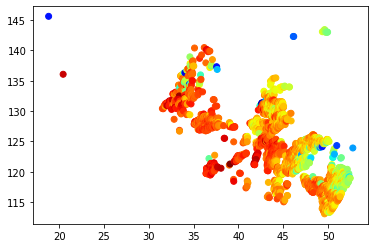

In [7]:
opened_file = Dataset(files_withDirectory[0], mode='r')

# Convert the 3d array to a 2d array
lons = opened_file.groups['PRODUCT'].variables['longitude'][:][0,l_min:l_max,:]
lats = opened_file.groups['PRODUCT'].variables['latitude'][:][0,l_min:l_max,:]
ch4 = opened_file.groups['PRODUCT'].variables['methane_mixing_ratio'][0,l_min:l_max,:]

#print(np.shape(lons))
#print(np.shape(lats))
#print(np.shape(ch4))  
lons = lons.flatten()
lats = lats.flatten()
ch4 = ch4.flatten()
print('plot')

plt.scatter(lats, lons, c=ch4, cmap='jet')    
plt.show()



C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


(100, 215)
(100, 215)
(100, 215)


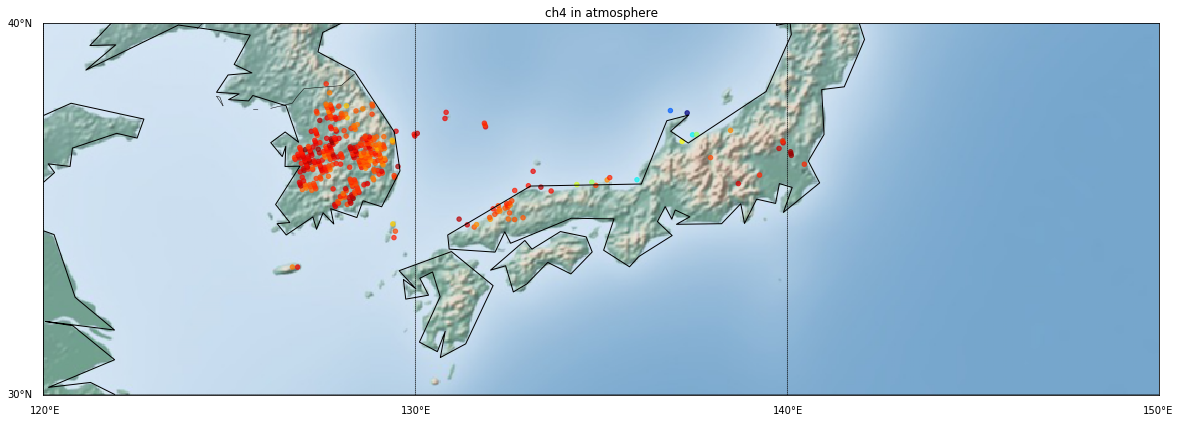

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(20,12))

m = Basemap(projection='cyl',            
            llcrnrlon=120, # longitude of lower left corner
            llcrnrlat=30, # latitude of lower left corner
            urcrnrlon=150, # longitude of upper right corner
            urcrnrlat=40, # latitude of upper right corner
            resolution='c')

# Add grid lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)
# Add world info
m.shadedrelief() # image of world
#m.etopo() # image of world
m.drawcoastlines()
m.drawcountries()
#m.drawrivers()


# Plot CH4 data
l_min = 2400
l_max = 2500
plane_data = np.array([[1800 for i in range(215)] for j in range(l_max-l_min)])


lons = None
lats = None
ch4 = None

for file in files_withDirectory:
    opened_file = Dataset(file, mode='r')
    
    # Convert the 3d array to a 2d array
    lons = opened_file.groups['PRODUCT'].variables['longitude'][:][0,l_min:l_max,:]
    lats = opened_file.groups['PRODUCT'].variables['latitude'][:][0,l_min:l_max,:]
    ch4 = opened_file.groups['PRODUCT'].variables['methane_mixing_ratio'][0,l_min:l_max,:]
    
    print(np.shape(lons))
    print(np.shape(lats))
    print(np.shape(ch4))  
    
    lons = lons.flatten()
    lats = lats.flatten()
    ch4 = ch4.flatten()
    
    
    # Draw reach of each file in format of a plane
    #m.pcolor(lons, lats, plane_data, cmap='jet', alpha=0.04)
    # Draw ch4 data
    #cs = m.pcolor(lons, lats, ch4, cmap='jet') 
    plt.scatter(lons, lats, c=ch4, cmap='jet', alpha=0.7, s=20) 
    
    
    break

#cbar = m.colorbar(cs, location='bottom', pad="10%")
plt.title('ch4 in atmosphere')
plt.show()